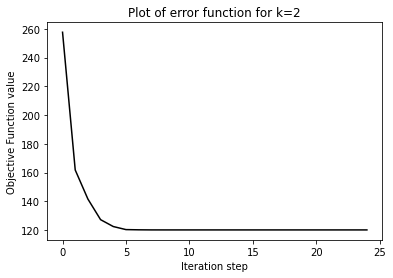

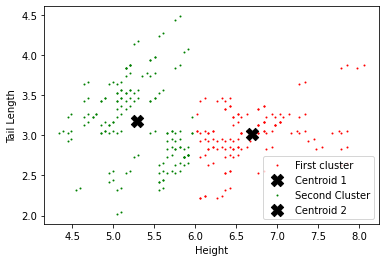

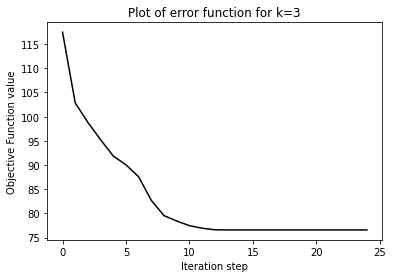

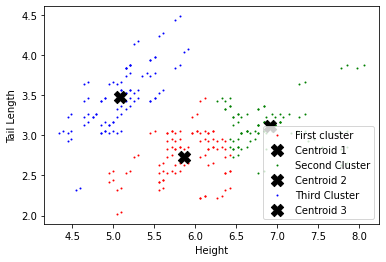

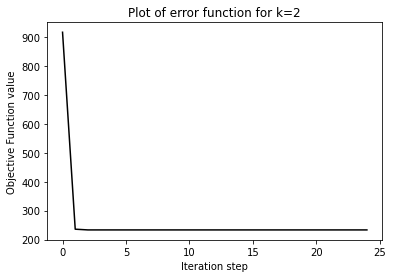

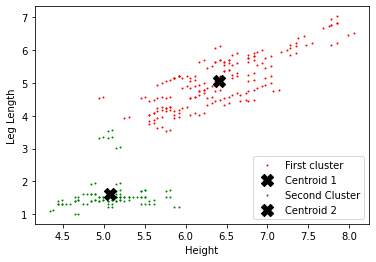

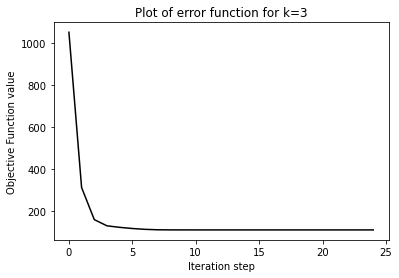

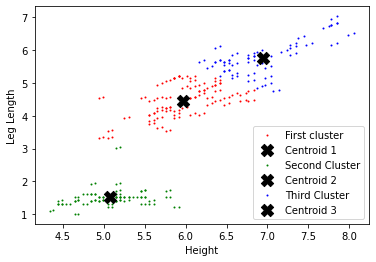

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

dataset = pd.read_csv('Task2 - dataset - dog_breeds(1).csv')

def compute_euclidean_distance(vec_1, vec_2):
    distance=np.sum(np.square(vec_1-vec_2),axis=1)
    return distance

#init the centroids randomly
def initialise_centroids(dataset, k):
    #create empty array for centroids
    centroids = []
    #randomly assigns the centroids and adds to array
    for cluster in range(k):
        rand = rd.randint(0,dataset.shape[0]-1)
        centroids.append(dataset[rand])
    #return centroid array
    return centroids

def kmeans(dataset, k):   
    #Initialise the centroids with  k set
    Centroids = initialise_centroids(dataset,k)
    
    plt.figure()
    error = [] #Array to hold error values
    #Initialises clusters assigned
    cluster_assigned={}
    
    #Runs 25 times to find convergence
    for counter in range(25):
        #Initialises array for holding distance
        euclidian_distance=np.array([]).reshape(dataset.shape[0],0)
        
        #Finding the distance between cluster
        for cluster in range(k):
            euclidian_distance=np.c_[euclidian_distance,compute_euclidean_distance(dataset,Centroids[cluster])]
        
        #Set the cluster indexes
        index=np.argmin(euclidian_distance,axis=1)+1
        
        #Temporary assignment for cluster assigned
        temp_cluster_assigned={}
        
        #Storing temporary values in array
        for cluster in range(k):
            temp_cluster_assigned[cluster+1]=np.array([]).reshape(2,0)
        
        #Setting the points
        for i in range(dataset.shape[0]):
            temp_cluster_assigned[index[i]]=np.c_[temp_cluster_assigned[index[i]],dataset[i]]
        
        #Transposing each cluster
        for cluster in range(k):
            temp_cluster_assigned[cluster+1]=temp_cluster_assigned[cluster+1].T
            
        error_value = errorCalc(Centroids, temp_cluster_assigned,k)#Calculating the error function
        error.append(error_value)
        
        #Get average of cluster 
        for cluster in range(k):
            Centroids[cluster]=np.mean(temp_cluster_assigned[cluster+1],axis=0)
            
        #Assigning the temporary assignment to return value
        cluster_assigned=temp_cluster_assigned
    #Plotting error function
    plt.plot([i for i in range(len(error))], error, c='k')
    plt.title("Plot of error function for k={}".format(k))
    plt.xlabel("Iteration step")
    plt.ylabel("Objective Function value")
    plt.show()
    
    #Return Centroids and Points
    return Centroids, cluster_assigned

#Plot the clustered data
def plotting(vec_o, vec_c, y, k):
    plt.figure()
    for cluster in range(k):
        plt.scatter(vec_o[cluster+1][:,0],vec_o[cluster+1][:,1],s=1,c=colour[cluster],label=labels[cluster])
        plt.scatter(vec_c[cluster][0],vec_c[cluster][1], marker = shape[cluster],s=150,c="k", label="Centroid {}".format(cluster+1))
    plt.xlabel('Height')
    plt.ylabel(y)
    plt.legend(loc = 'lower right')
    plt.show()


def errorCalc(centroids, cluster_assigned, k):
    #Holds the error value
    error = 0
    
    #Going through each cluster
    for cluster in range(k):
        dataInCluster = cluster_assigned[cluster+1]
        
        #for each point in the cluster add its distance to the total
        for data in dataInCluster:
            error = error + np.sum((data - centroids[cluster]) ** 2)
            
    #Return error value
    return error
    

colour=['red','green','blue']#Set the colour of the clusters 
shape=["X","X","X"] #Sets the shape of the mean position in the cluster
labels=['First cluster','Second Cluster','Third Cluster'] #Labels the cluster

#Set the columns to a variable
dataset1 = dataset.iloc[:, [0, 1]].values
dataset2 = dataset.iloc[:, [0, 2]].values 

#Plotting the graphs for each change in k and dataset
#Height against Tail Length
vec1_2_c, vec1_2_o = kmeans(dataset1, 2)
plotting(vec1_2_o, vec1_2_c, 'Tail Length', 2)

vec1_3_c, vec1_3_o = kmeans(dataset1, 3)
plotting(vec1_3_o, vec1_3_c, 'Tail Length', 3)

#Height against Leg Length
vec2_2_c, vec2_2_o = kmeans(dataset2, 2) 
plotting(vec2_2_o, vec2_2_c, 'Leg Length', 2)

vec2_3_c, vec2_3_o = kmeans(dataset2, 3)
plotting(vec2_3_o, vec2_3_c, 'Leg Length', 3)
